# Lab 3 - Data Visualization - 21KHDL

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# <center>Iris Species EDA 📊</center>
<div style="width:100%;text-align: center;"> <img align = middle src="https://camo.githubusercontent.com/42abe3d5f8402b9352e13fce37e00d575ccb9f220d10fd31e0318b3c598f352a/68747470733a2f2f656469746f722e616e616c79746963737669646879612e636f6d2f75706c6f6164732f353135313869726973253230696d67312e706e67" style="height:800;"> </div>

# Table of Contents

1. [Data Understanding](#1.-Data-Understanding)
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    - 2.1 [Univariate Analysis](#2.1.-Univariate-Analysis)
    - 2.2 [Bivariate Analysis](#2.2.-Bivariate-Analysis)
    - 2.3 [Multivariate Analysis](#2.3.-Multivariate-Analysis)
    - 2.4 [3D Visualization](#2.4.-3D-Visualization)
    - 2.5 [Correlations Analysis](#2.5.-Correlations-Analysis)
3. [Insights](#3.-Insights)
4. [References](#4.-References)

# About the Dataset
**Iris Dataset** is a classic dataset used in pattern recognition, machine learning, and data visualization. It was introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset is small but does not lack in illustrating the challenges in clustering or classifying flowers based on the measurements of their characteristics.

The dataset contains `150` observations of iris flowers from three different species `Iris Setosa`, `Iris Versicolor`, and `Iris Virginica`. There are `50` observations from each species.

Description of the data given:
- **Id**: Unique number for each row
- **SepalLengthCm**: Length of the sepal (in cm)
- **SepalWidthCm**: Width of the sepal (in cm)
- **PetalLengthCm**: Length of the petal (in cm)
- **PetalWidthCm**: Width of the petal (in cm)
- **Species**: Name of the species

The above attributes, including sepal length, sepal width, petal length, and petal width, are important features of flowers in the iris dataset. They are commonly used in machine learning and statistical analysis to classify and identify different species of iris flowers based on their measurements. These measurements help in understanding the physical characteristics of the flowers and can be utilized for various applications in botany, ecology, and data analysis.

# Importing the Necessary Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import StandardScaler        

import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding

### Reading the dataset

In [79]:
df = pd.read_csv('data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Typically, the `Id` column is just a column containing a sequential or unique number encoding each sample. It does not contain any meaningful or useful information regarding the characteristics of the Iris flower. By eliminating the `Id` column, we simplify data processing and analysis, making code or statistical operations on the data easier and clearer. 

So let's drop it

In [80]:
# Drooping Id 
df.drop(columns=['Id'],inplace=True)

### Shape of data

In [81]:
num_rows, num_columns = df.shape
#Printing the number of rows and columns.
print("Iris Flower Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")

Iris Flower Data:
Number of Rows: 150
Number of Columns: 5



### Lets take a look at the information in our dataset

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Looking at the statistics of our dataset

In [83]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations:**
1. `Sepal Length`:
    - The average sepal length across all samples is approximately 5.84 cm, with a standard deviation of 0.83 cm. This means that most sepals are around this length, but there can be a variation of about 0.83 cm.
    - The shortest sepal is 4.3 cm, and the longest is 7.9 cm.
    - The 25%, 50% (median), and 75% percentiles indicate that 50% of the sepals have a length between 5.1 cm and 6.4 cm.
2. `Sepal Width`:
    - The average sepal width is about 3.05 cm, with a standard deviation of 0.43 cm.
    - The narrowest sepal is 2.0 cm, and the widest is 4.4 cm.
    - Half of the sepals have a width between 2.8 cm and 3.3 cm.
3. `Petal Length`:
    - The average petal length is approximately 3.76 cm, with a standard deviation of 1.76 cm, indicating a higher variability in petal length compared to sepal dimensions.
    - The shortest petal is 1.0 cm, and the longest is 6.9 cm.
    - Half of the petals have a length between 1.6 cm and 5.1 cm.
4. `Petal Width`:
    - The average petal width is about 1.20 cm, with a standard deviation of 0.76 cm.
    - The narrowest petal is 0.1 cm, and the widest is 2.5 cm.
    - Half of the petals have a width between 0.3 cm and 1.8 cm.

### Lets check for any missing values in the dataset

In [84]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


### Lets check for any duplicate values in the dataset

In [85]:
# Count duplicate rows in train_data
data_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows in Data: {data_duplicates}")

Number of duplicate rows in Data: 3


In [86]:
# Find duplicate rows in df
duplicate_rows = df[df.duplicated(keep=False)]

print(duplicate_rows)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
9              4.9           3.1            1.5           0.1     Iris-setosa
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
101            5.8           2.7            5.1           1.9  Iris-virginica
142            5.8           2.7            5.1           1.9  Iris-virginica


Duplicate data is relatively small and not too significant for data analysis, so in order to make the `Species` distribution more balanced and convenient for analysis, we will not drop duplicate it.

Taking a look at the different types of `Species` and counting the total number of unique values so that we can look the class distribution of our dataset.

In [87]:
print("The different Species in the dataset are:", df['Species'].unique())
print("The total number of unique species are:", df['Species'].nunique())

The different Species in the dataset are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The total number of unique species are: 3


# 2. Exploratory Data Analysis
We should try to visualize the distribution of the `Species` in our dataset to see if the classes are balanced.

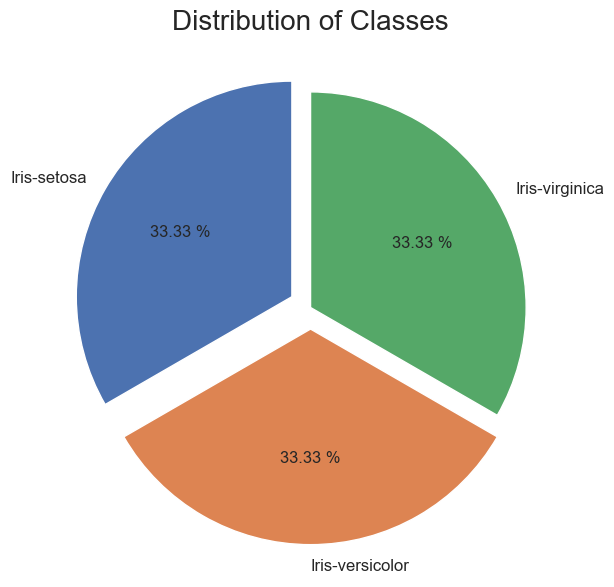

In [88]:
count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

**Observations**:
The classes are equally balanced. Now, let us look at the count of each flower type in our dataset.

In [89]:
print("The distribution of the classes is:\n", df['Species'].value_counts(), sep = "")

The distribution of the classes is:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 2.1. Univariate Analysis
Univariate analysis is the simplest form of analyzing data. We only take a single variable into consideration and try to find relations based on that. 

### Numerical Features Distribution

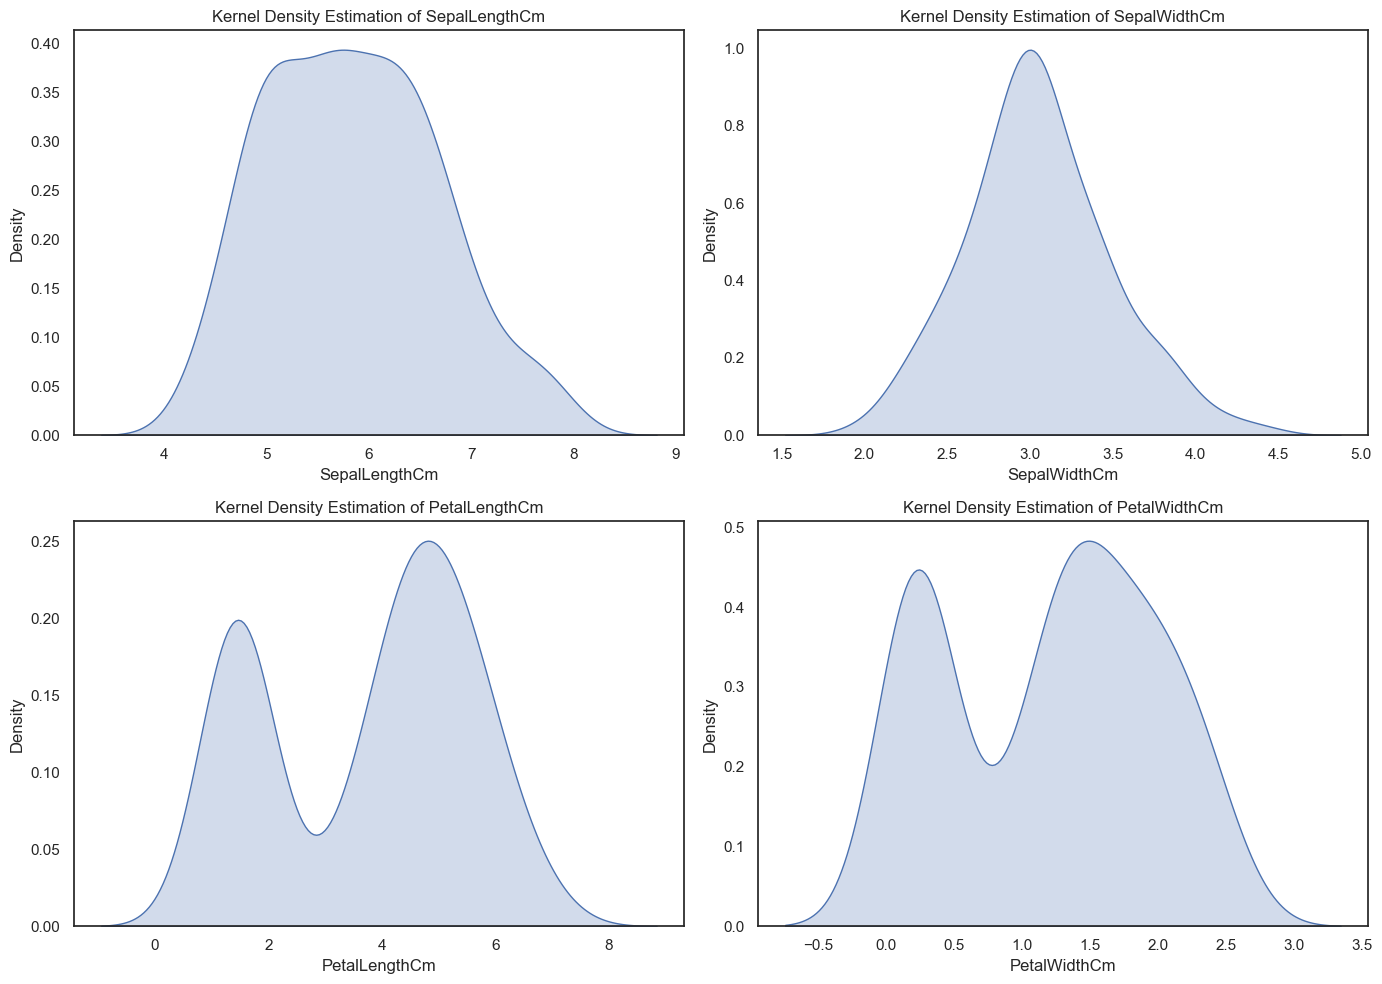

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array
axs = axs.flatten()

for i, feature in enumerate(df.columns[:-1]):  # Exclude the last column 'Species'
    sns.kdeplot(data=df, x=feature, fill=True, ax=axs[i])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Density')
    axs[i].set_title(f'Kernel Density Estimation of {feature}')

plt.tight_layout()
plt.show()

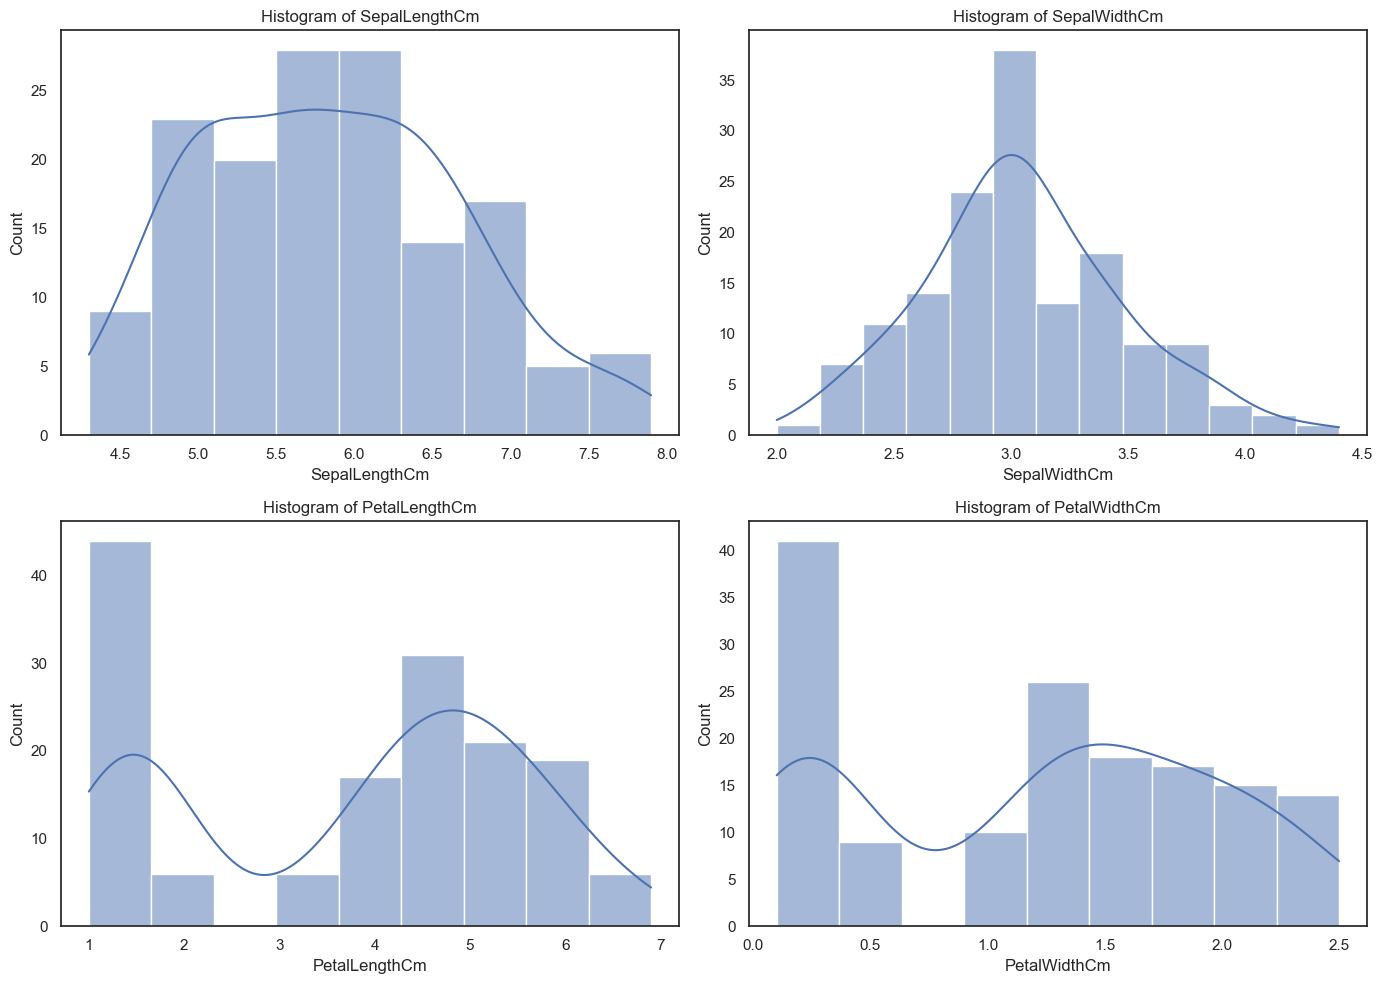

In [91]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axs[i])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

**Observations**:

1. `Petal Length`:
    - The histogram shows two distinct groups in the petal length data, which suggests that this feature might be a good indicator to differentiate between certain Iris species.
    - One group is centered around a petal length of 1-2 cm, and the other is more spread out, ranging from 3 to 7 cm. This could potentially indicate a difference between a certain Iris species with shorter petals and the other species with longer petals.
2. `Petal Width`:
    - Similar to petal length, petal width also shows two distinct groups. One group has a petal width of less than 1 cm, and the other ranges from 1 to 2.5 cm.
    - This feature could also be useful in differentiating between Iris species.
3. `Sepal Length`:
    - The sepal length data appears to follow a normal distribution, with most of the lengths centered around 5-6 cm.
    - There doesn't seem to be a clear separation or grouping in the sepal length data, which suggests that sepal length alone might not be a good feature to differentiate between the species.
4. `Sepal Width`:
    - The sepal width data also appears to follow a normal distribution, with most of the widths centered around 3 cm.
    - Like sepal length, sepal width also doesn't show clear separations or groups, suggesting that it might not be as useful for differentiating between the species as petal length or petal width.

## 2.2. Bivariate Analysis

**Question**: 
>"What visual insights can be derived from the distribution of sepal and petal characteristics (length and width) across different species of Iris flowers?"

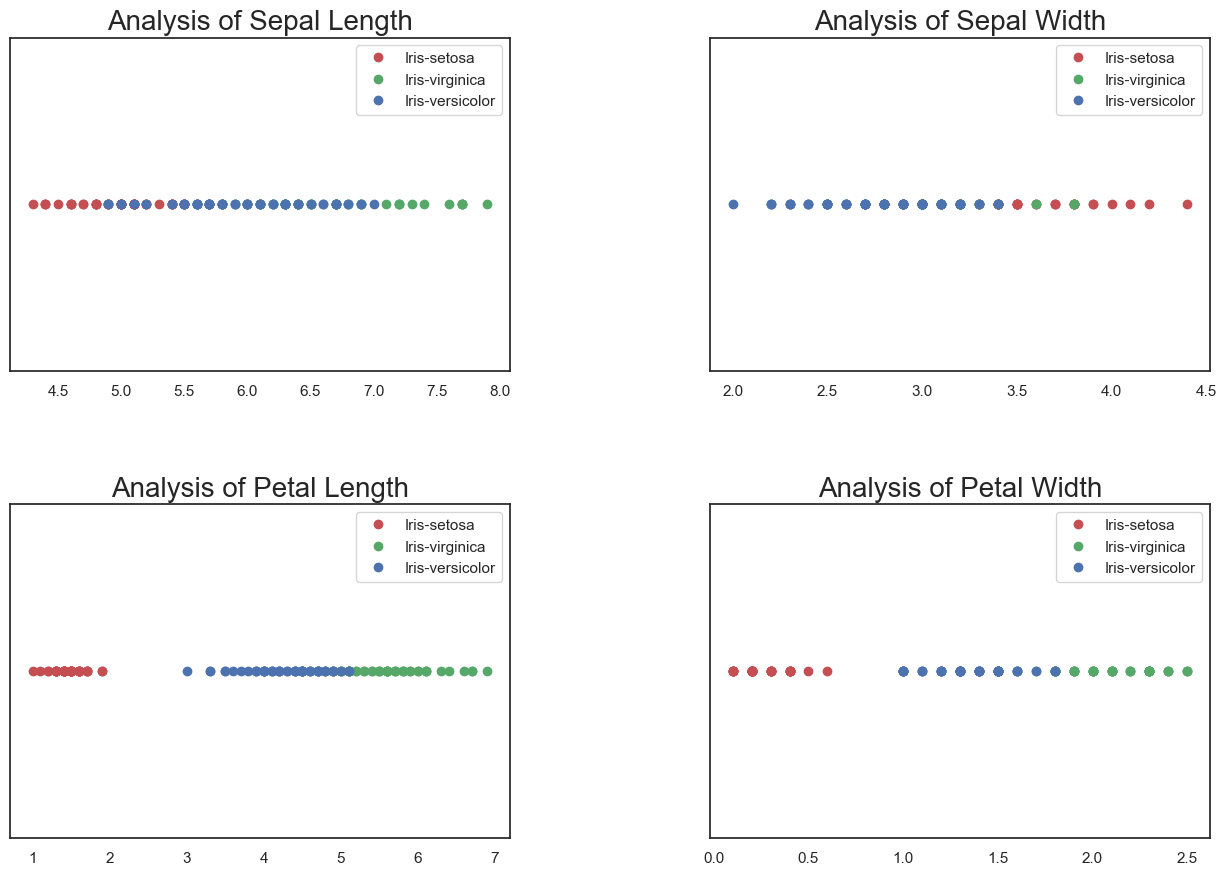

In [92]:
fig = plt.figure(figsize = (15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot((df[df['Species'] == 'Iris-setosa'])['SepalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['SepalLengthCm']), 'ro', label='Iris-setosa')
ax1.plot((df[df['Species'] == 'Iris-virginica'])['SepalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['SepalLengthCm']), 'go', label='Iris-virginica')
ax1.plot((df[df['Species'] == 'Iris-versicolor'])['SepalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['SepalLengthCm']), 'bo', label='Iris-versicolor')
ax1.set_title('Analysis of Sepal Length', size = 20)
ax1.get_yaxis().set_visible(False)
ax1.legend()

ax2.plot((df[df['Species'] == 'Iris-setosa'])['SepalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['SepalWidthCm']), 'ro', label='Iris-setosa')
ax2.plot((df[df['Species'] == 'Iris-virginica'])['SepalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['SepalWidthCm']), 'go', label='Iris-virginica')
ax2.plot((df[df['Species'] == 'Iris-versicolor'])['SepalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['SepalWidthCm']), 'bo', label='Iris-versicolor')
ax2.set_title('Analysis of Sepal Width', size = 20)
ax2.get_yaxis().set_visible(False)
ax2.legend()

ax3.plot((df[df['Species'] == 'Iris-setosa'])['PetalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['PetalLengthCm']), 'ro', label='Iris-setosa')
ax3.plot((df[df['Species'] == 'Iris-virginica'])['PetalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['PetalLengthCm']), 'go', label='Iris-virginica')
ax3.plot((df[df['Species'] == 'Iris-versicolor'])['PetalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['PetalLengthCm']), 'bo', label='Iris-versicolor')
ax3.set_title('Analysis of Petal Length', size = 20)
ax3.get_yaxis().set_visible(False)
ax3.legend()

ax4.plot((df[df['Species'] == 'Iris-setosa'])['PetalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['PetalWidthCm']), 'ro', label='Iris-setosa')
ax4.plot((df[df['Species'] == 'Iris-virginica'])['PetalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['PetalWidthCm']), 'go', label='Iris-virginica')
ax4.plot((df[df['Species'] == 'Iris-versicolor'])['PetalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['PetalWidthCm']), 'bo', label='Iris-versicolor')
ax4.set_title('Analysis of Petal Width', size = 20)
ax4.get_yaxis().set_visible(False)
ax4.legend()

plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0.4, 
                    hspace = 0.4)
plt.show()

**Observations**:
1. `SepalLengthCm`: 
    - Iris-setosa has the smallest sepal length. We can see an outlier (red dot) in the graph.
    - Iris-versicolor has a sepal length of about 5 cm to 7 cm. 
    - Iris-virginica has the largest sepal length (above 7 cm).
2. `SepalWidthCm`: 
    - Iris-versicolor has the smallest sepal width. 
    - The distinction between setosa and virginica is not so prominent in the range of 3.5 cm to 4 cm. 
    - However for a sepal width equal to or greater than 4 cm all the flowers belong to the Iris-setosa species.
3. `PetalLengthCm`: 
    - Iris-setosa has the smallest petal length. The length of the petals do not exceed 2 cm. 
    - For Iris-versicolor the petal length is in the range of 3 cm to 5 cm. 
    - Iris-virginica has the largest petal length (5 cm or greater).
4. `PetalWidthCm`: 
    - Iris-setosa has the smallest petal width. 
    - Iris-versicolor has a petal length from 1 cm to slightly less than 2 cm. 
    - Iris-virginica has a petal width that is approximately greater than 1.8 cm.

Boxplots are a standardized way of displaying the distribution of data.

**Question**: 
>"What are the variations in sepal and petal dimensions (length and width) among different species of Iris flowers, as illustrated by the boxplots?"

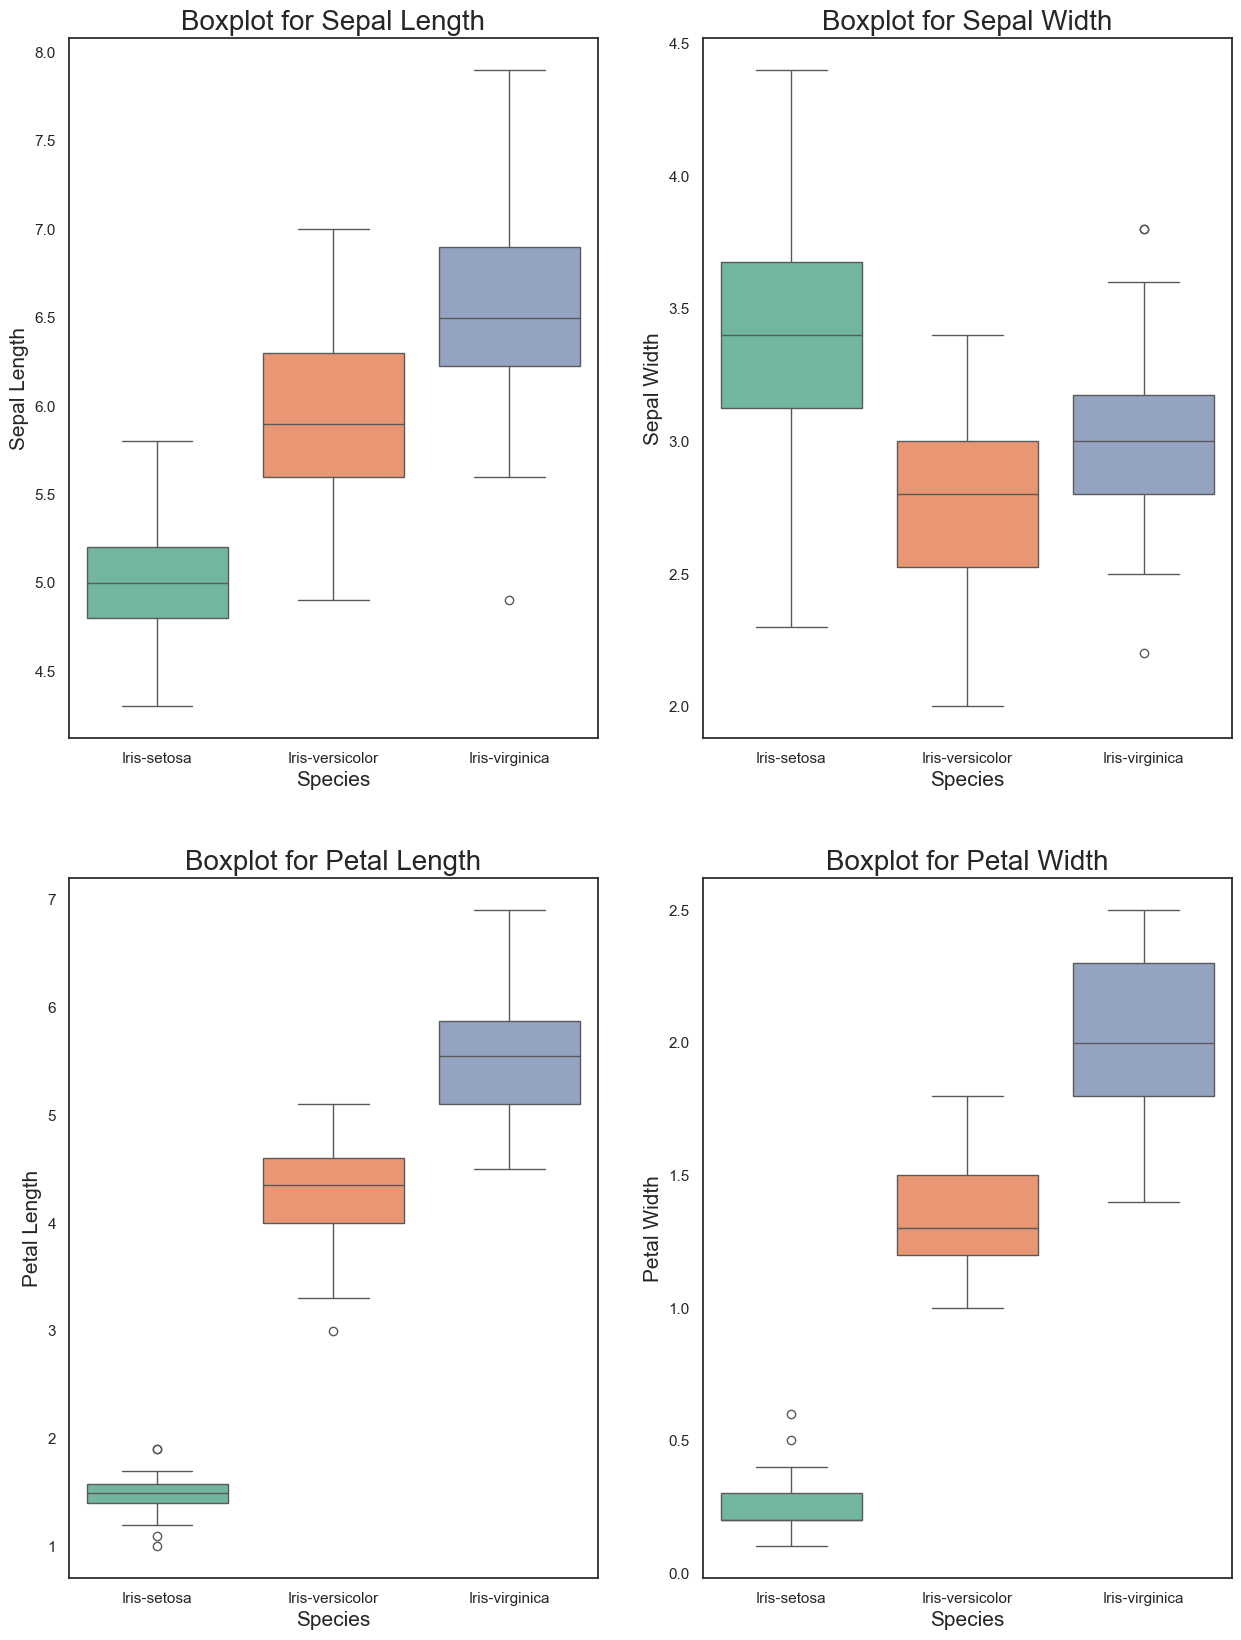

In [93]:
plt.figure(figsize=(15, 20))

def create_boxplot(feature):
    sns.boxplot(data = df, x = 'Species', y = feature, hue='Species', palette='Set2')
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_boxplot('SepalLengthCm')
  
plt.subplot(222)
create_boxplot('SepalWidthCm')
  
plt.subplot(223)
create_boxplot('PetalLengthCm')
  
plt.subplot(224)
create_boxplot('PetalWidthCm')
  
plt.show()

**Observations**:
1. `SepalLengthCm`:
    - The median value for sepal length is the least for Iris-setosa and the most for Iris-virginica.
2. `SepalWidthCm`: 
    - The median value for sepal width is the least for Iris-versicolor and the largest for Iris-setosa.
    - Based on the sepal width of the flowers it might be tough to differentiate between the 3 species.
3. `PetalLengthCm`: 
    - Visually it is very evident that Iris-setosa has the least petal length.
    - Even though there are a few outliers all of them are less than 2 cm. Iris-versicolor has the second largest median petal length, whereas Iris-virginica has the largest median petal length.
4. `PetalWidthCm`: 
    - Similar to the petal lengths of the species, we can see that Iris-setosa has the lowest median petal width, whereas Iris-virginica has the largest median petal width.

**Question**: 
>"What insights can be gained from the distribution of sepal and petal dimensions (length and width) among different species of Iris flowers, as depicted by the violin plots?"

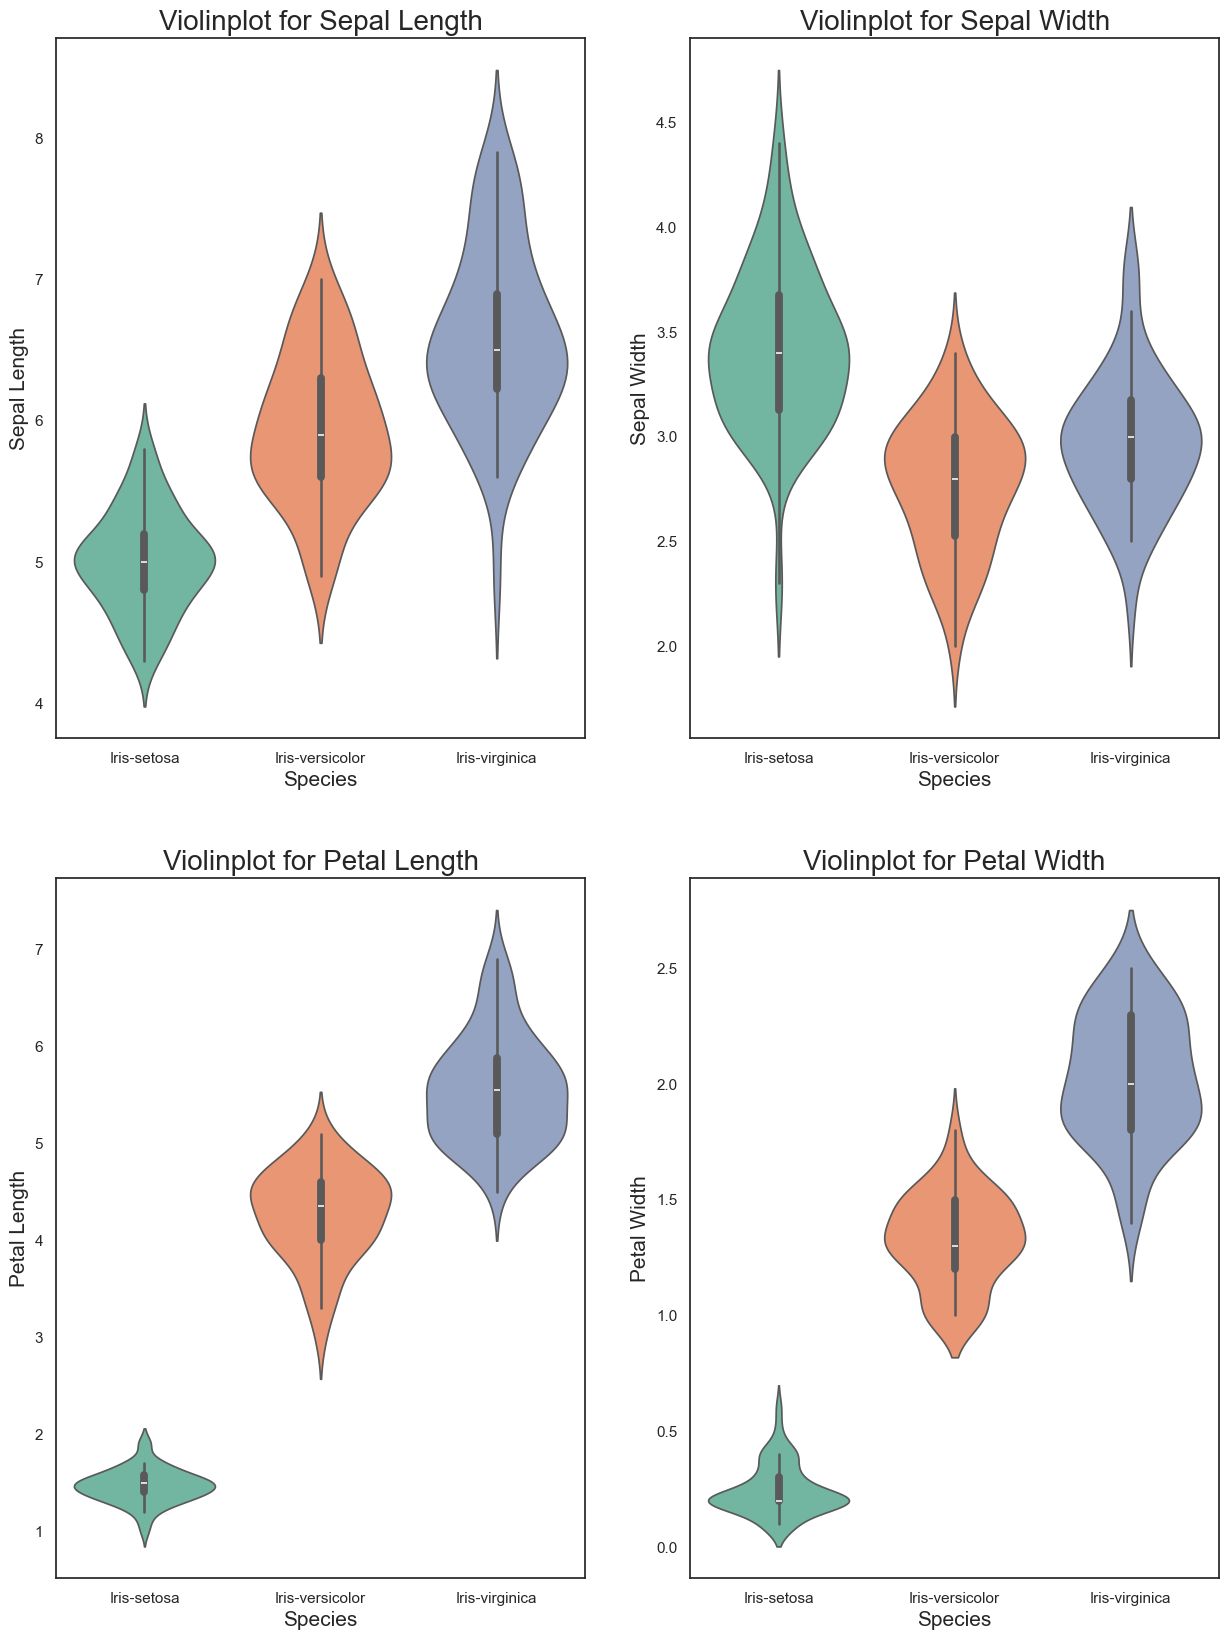

In [94]:
plt.figure(figsize=(15, 20))

def create_violinplot(feature):
    sns.violinplot(data = df, x = 'Species', y = feature, hue='Species', palette='Set2')
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Violinplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_violinplot('SepalLengthCm')
  
plt.subplot(222)
create_violinplot('SepalWidthCm')
  
plt.subplot(223)
create_violinplot('PetalLengthCm')
  
plt.subplot(224)
create_violinplot('PetalWidthCm')
  
plt.show()

**Observations**:
In terms of the median the observations from the violin-plot are similar to that of the box-plot.
1. `SepalLengthCm`: 
    - There is a high probability that Iris-setosa will have a sepal length of 5 cm.
    - It's clear that the Setosa species tends to have shorter sepals compared to the other two species.
    - Versicolor and Virginica have more overlap in sepal length, but Virginica tends to have slightly longer sepals.
2. `SepalWidthCm`: 
    - The Setosa species tends to have wider sepals compared to the other two species.
    - For Iris-versicolor and Iris-virginica there is a high probability that they will have approximately the same sepal width, but Versicolor tends to have slightly narrower sepals. Thus identification of the species based on this feature only might not yield good results.
3. `PetalLengthCm`: 
    - Most of petal lengths for Iris-setosa are about 1.5 cm.
    - The petal length clearly differentiates the Setosa species from the other two. Setosa has significantly shorter petals.
    - Versicolor and Virginica also show some differentiation, with Virginica having longer petals.
4. `PetalWidthCm`: 
    - Similar to petal length, petal width also clearly differentiates the Setosa species, which has narrower petals.
    - Versicolor has intermediate petal width, and Virginica has the widest petals.
    - There is a high probability that the petal width for Iris-setosa species would be approximately 0.25 cm. 
    - The violin plots for Iris-versicolor and Iris-virginica are not as broad as that of Iris-setosa.

## 2.3 Multivariate Analysis

**Question**: 
>"How does the relationship between petal length and width vary across different species of Iris flowers, as shown in the scatter plot?"

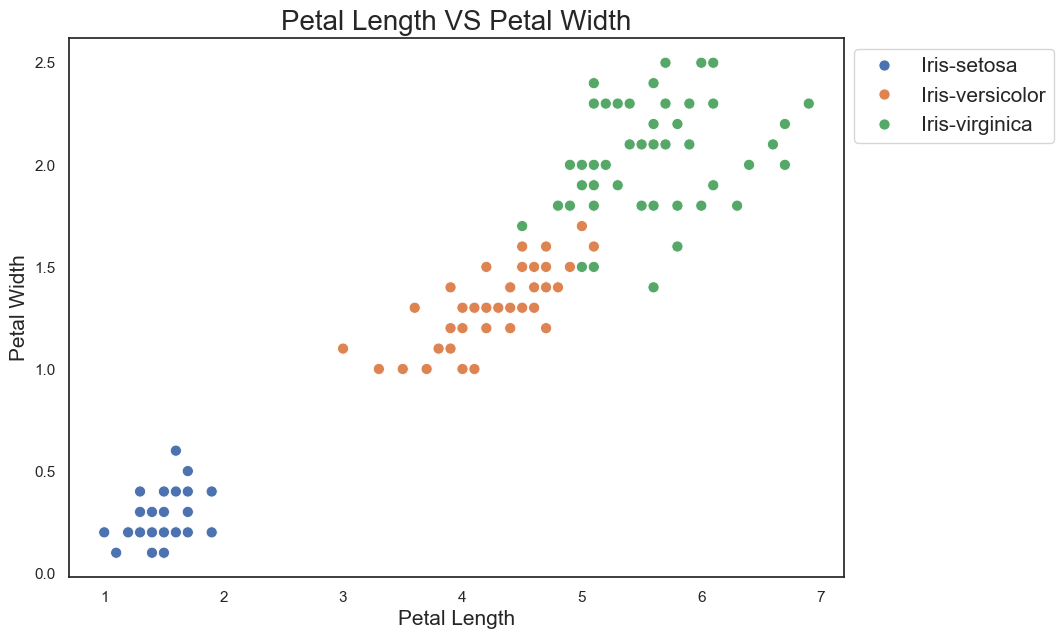

In [95]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Petal Length VS Petal Width', fontsize = 20)
plt.xlabel('Petal Length', fontsize = 15)
plt.ylabel('Petal Width', fontsize = 15)
plt.show()

**Observations**:
We can see that the petal length and petal width is the least for Iris-setosa. The petal width and length for Iris-versicolor lies in an intermediate range, between that of setosa and virginica. Iris-virginica has the largest petal length and width. A few outliers exist in the case of both versicolor and virginica.

**Question**: 
>"What insights can be derived from the scatter plot comparing sepal length and width among different species of Iris flowers?"

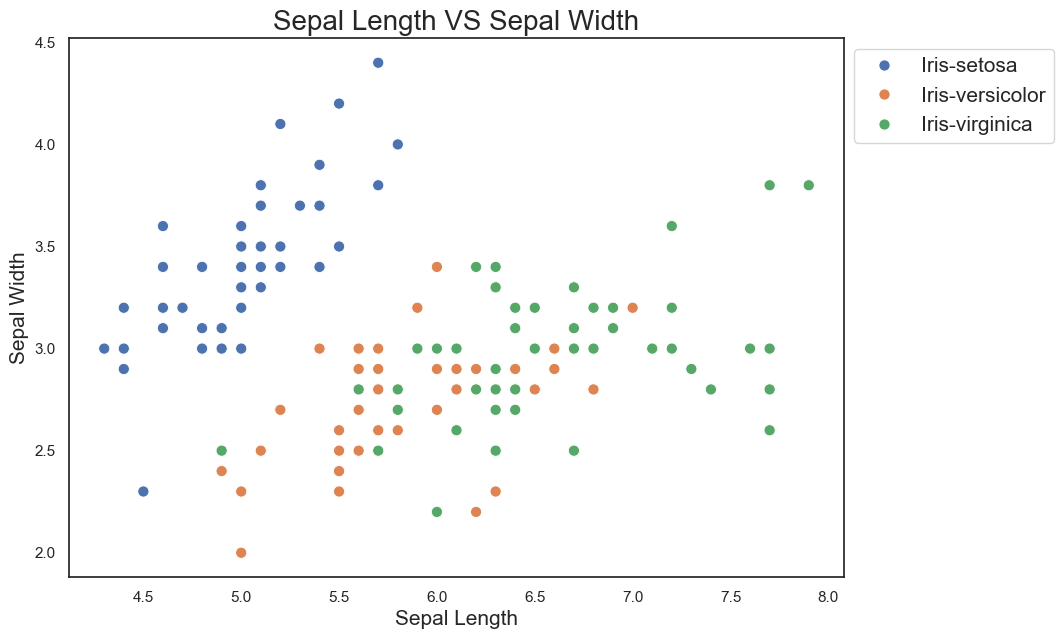

In [96]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Sepal Length VS Sepal Width', fontsize = 20)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

**Observation**:
We can observe that Iris-setosa has a relatively lower sepal length (as compared to versicolor or virginica). Iris-setosa has a large sepal width. It is hard to distinguish between versicolor and virginica based on sepal length and width. 

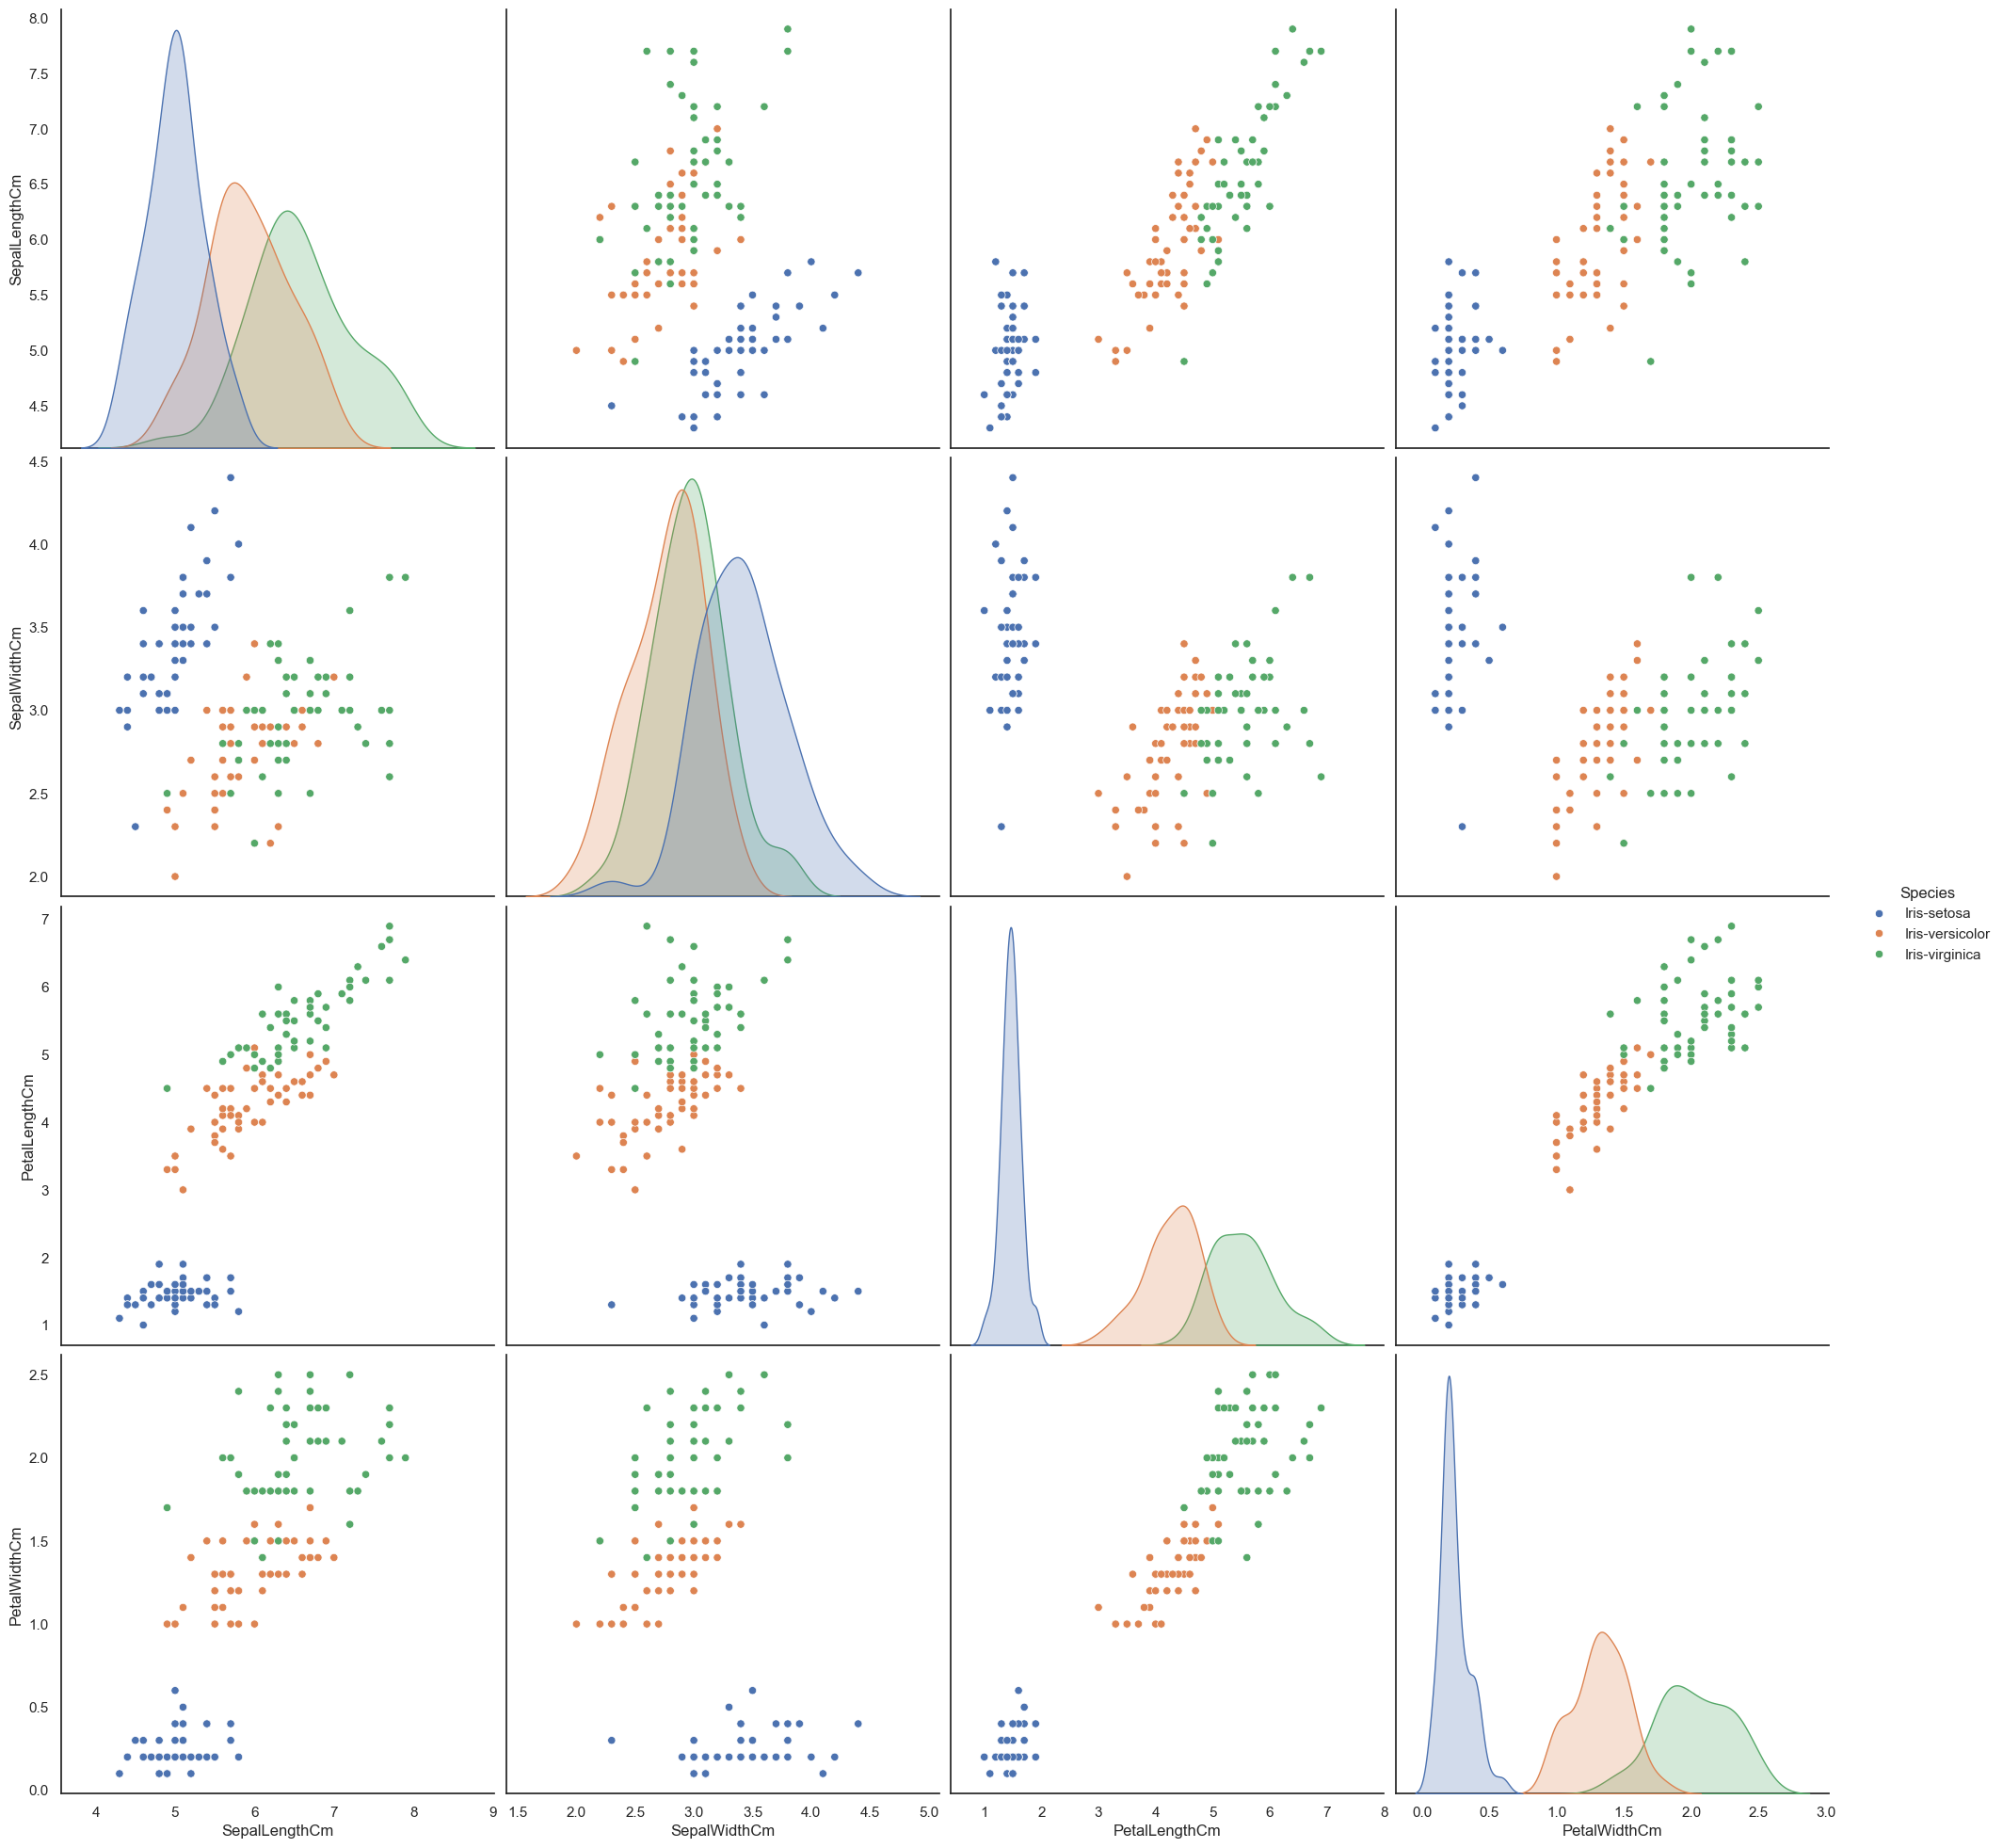

In [97]:
sns.pairplot(df, hue = 'Species', height = 5)
plt.show()

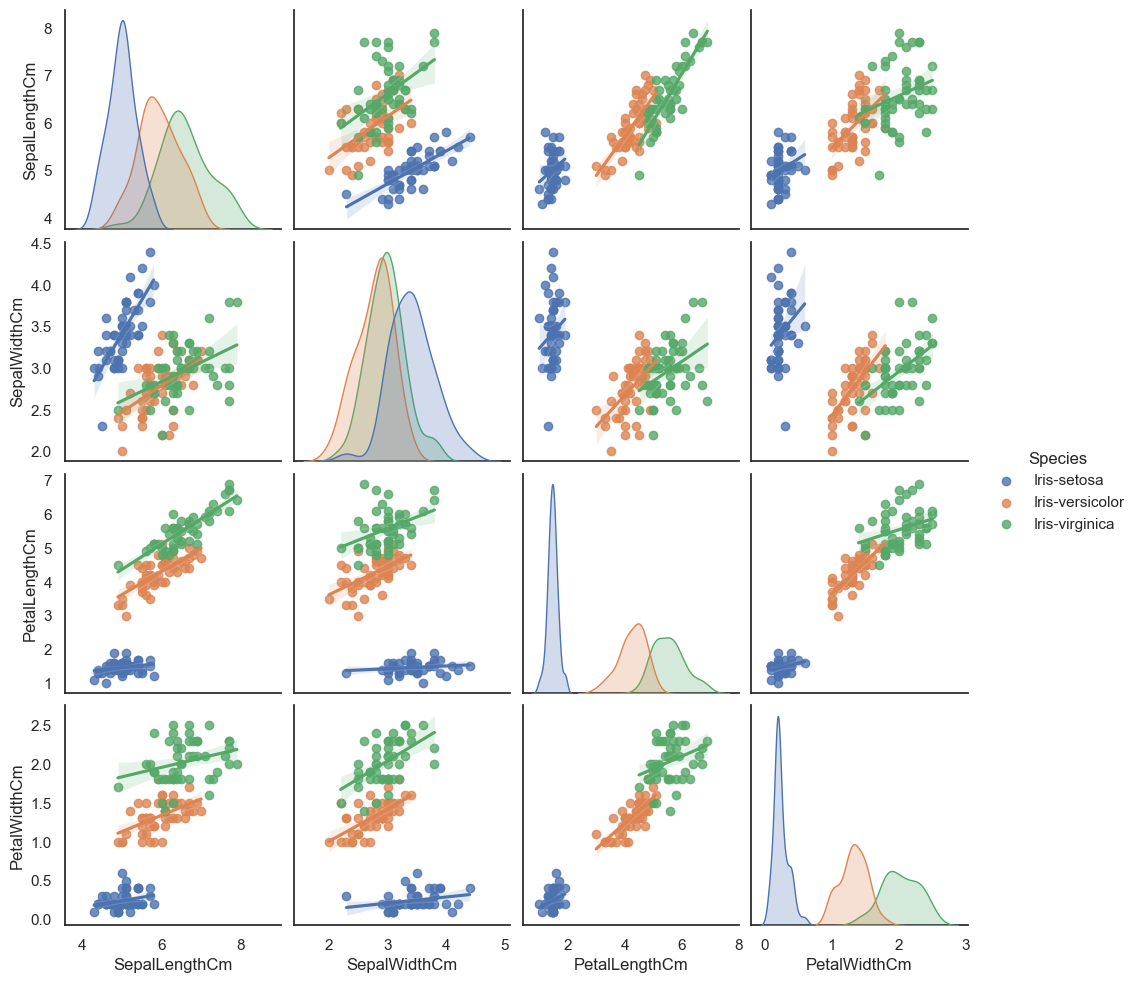

In [98]:
sns.pairplot(data=df, kind='reg', hue='Species')
plt.show()

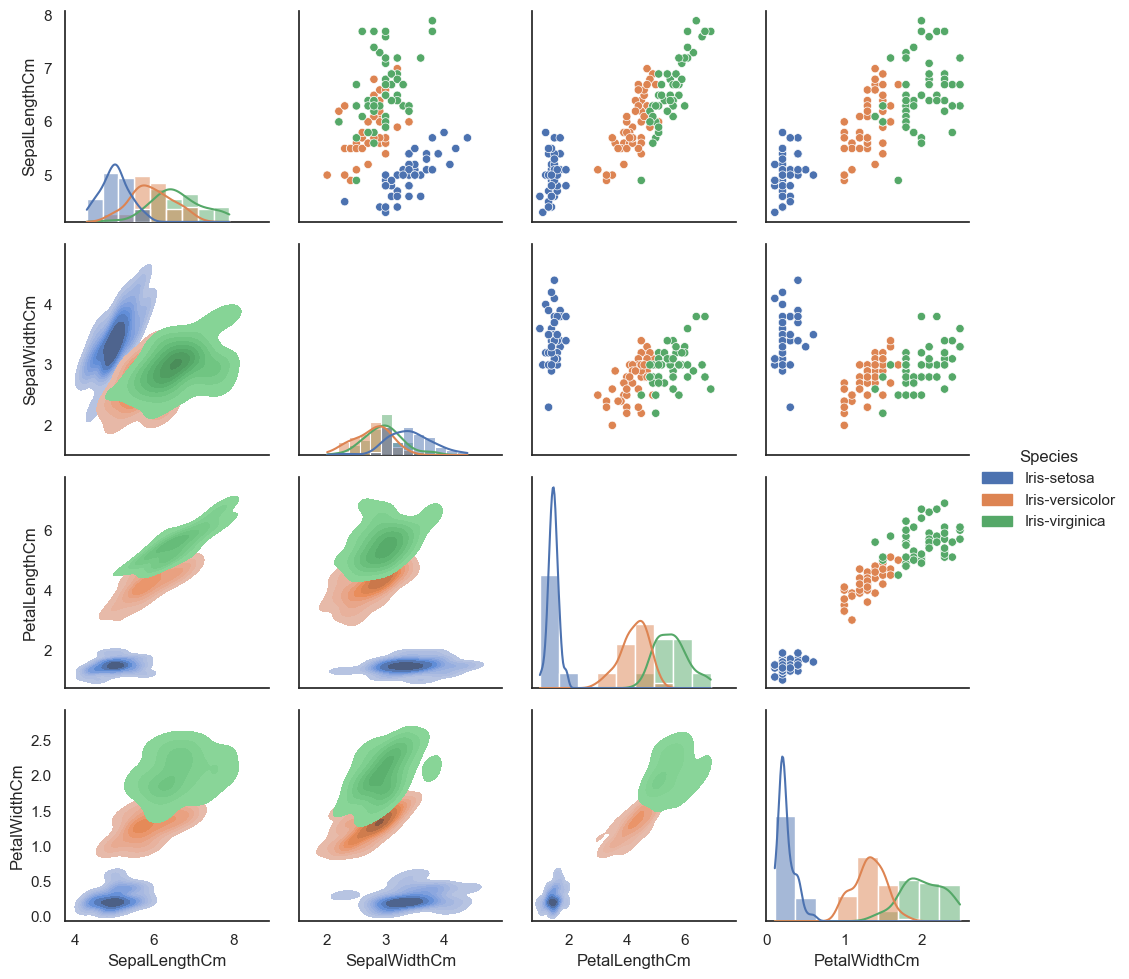

In [99]:
sns.set(style="white")
g = sns.PairGrid(df, hue="Species")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend()
plt.show()

**Observations:**
1.  `Sepal Length` vs. `Sepal Width`: There's some overlap between the species, but it's clear that Setosa generally has shorter and wider sepals compared to the other two species.

2. `Petal Length` vs. `Petal Width`: This pair of features clearly differentiates the species. Setosa has shorter and narrower petals, Versicolor has medium-length and medium-width petals, and Virginica has the longest and widest petals.

3. `Sepal Length` vs. `Petal Length` and `Sepal Length` vs. `Petal Width`: These plots show that Setosa has shorter sepals and petals, while Virginica has the longest sepals and petals. Versicolor falls in between.

4. `Sepal Width` vs. `Petal Length` and `Sepal Width` vs. `Petal Width`: These plots show that Setosa has wider sepals and shorter petals. On the other hand, Virginica has narrower sepals and longer petals. Versicolor falls in between.

## 2.4. 3D Visualization

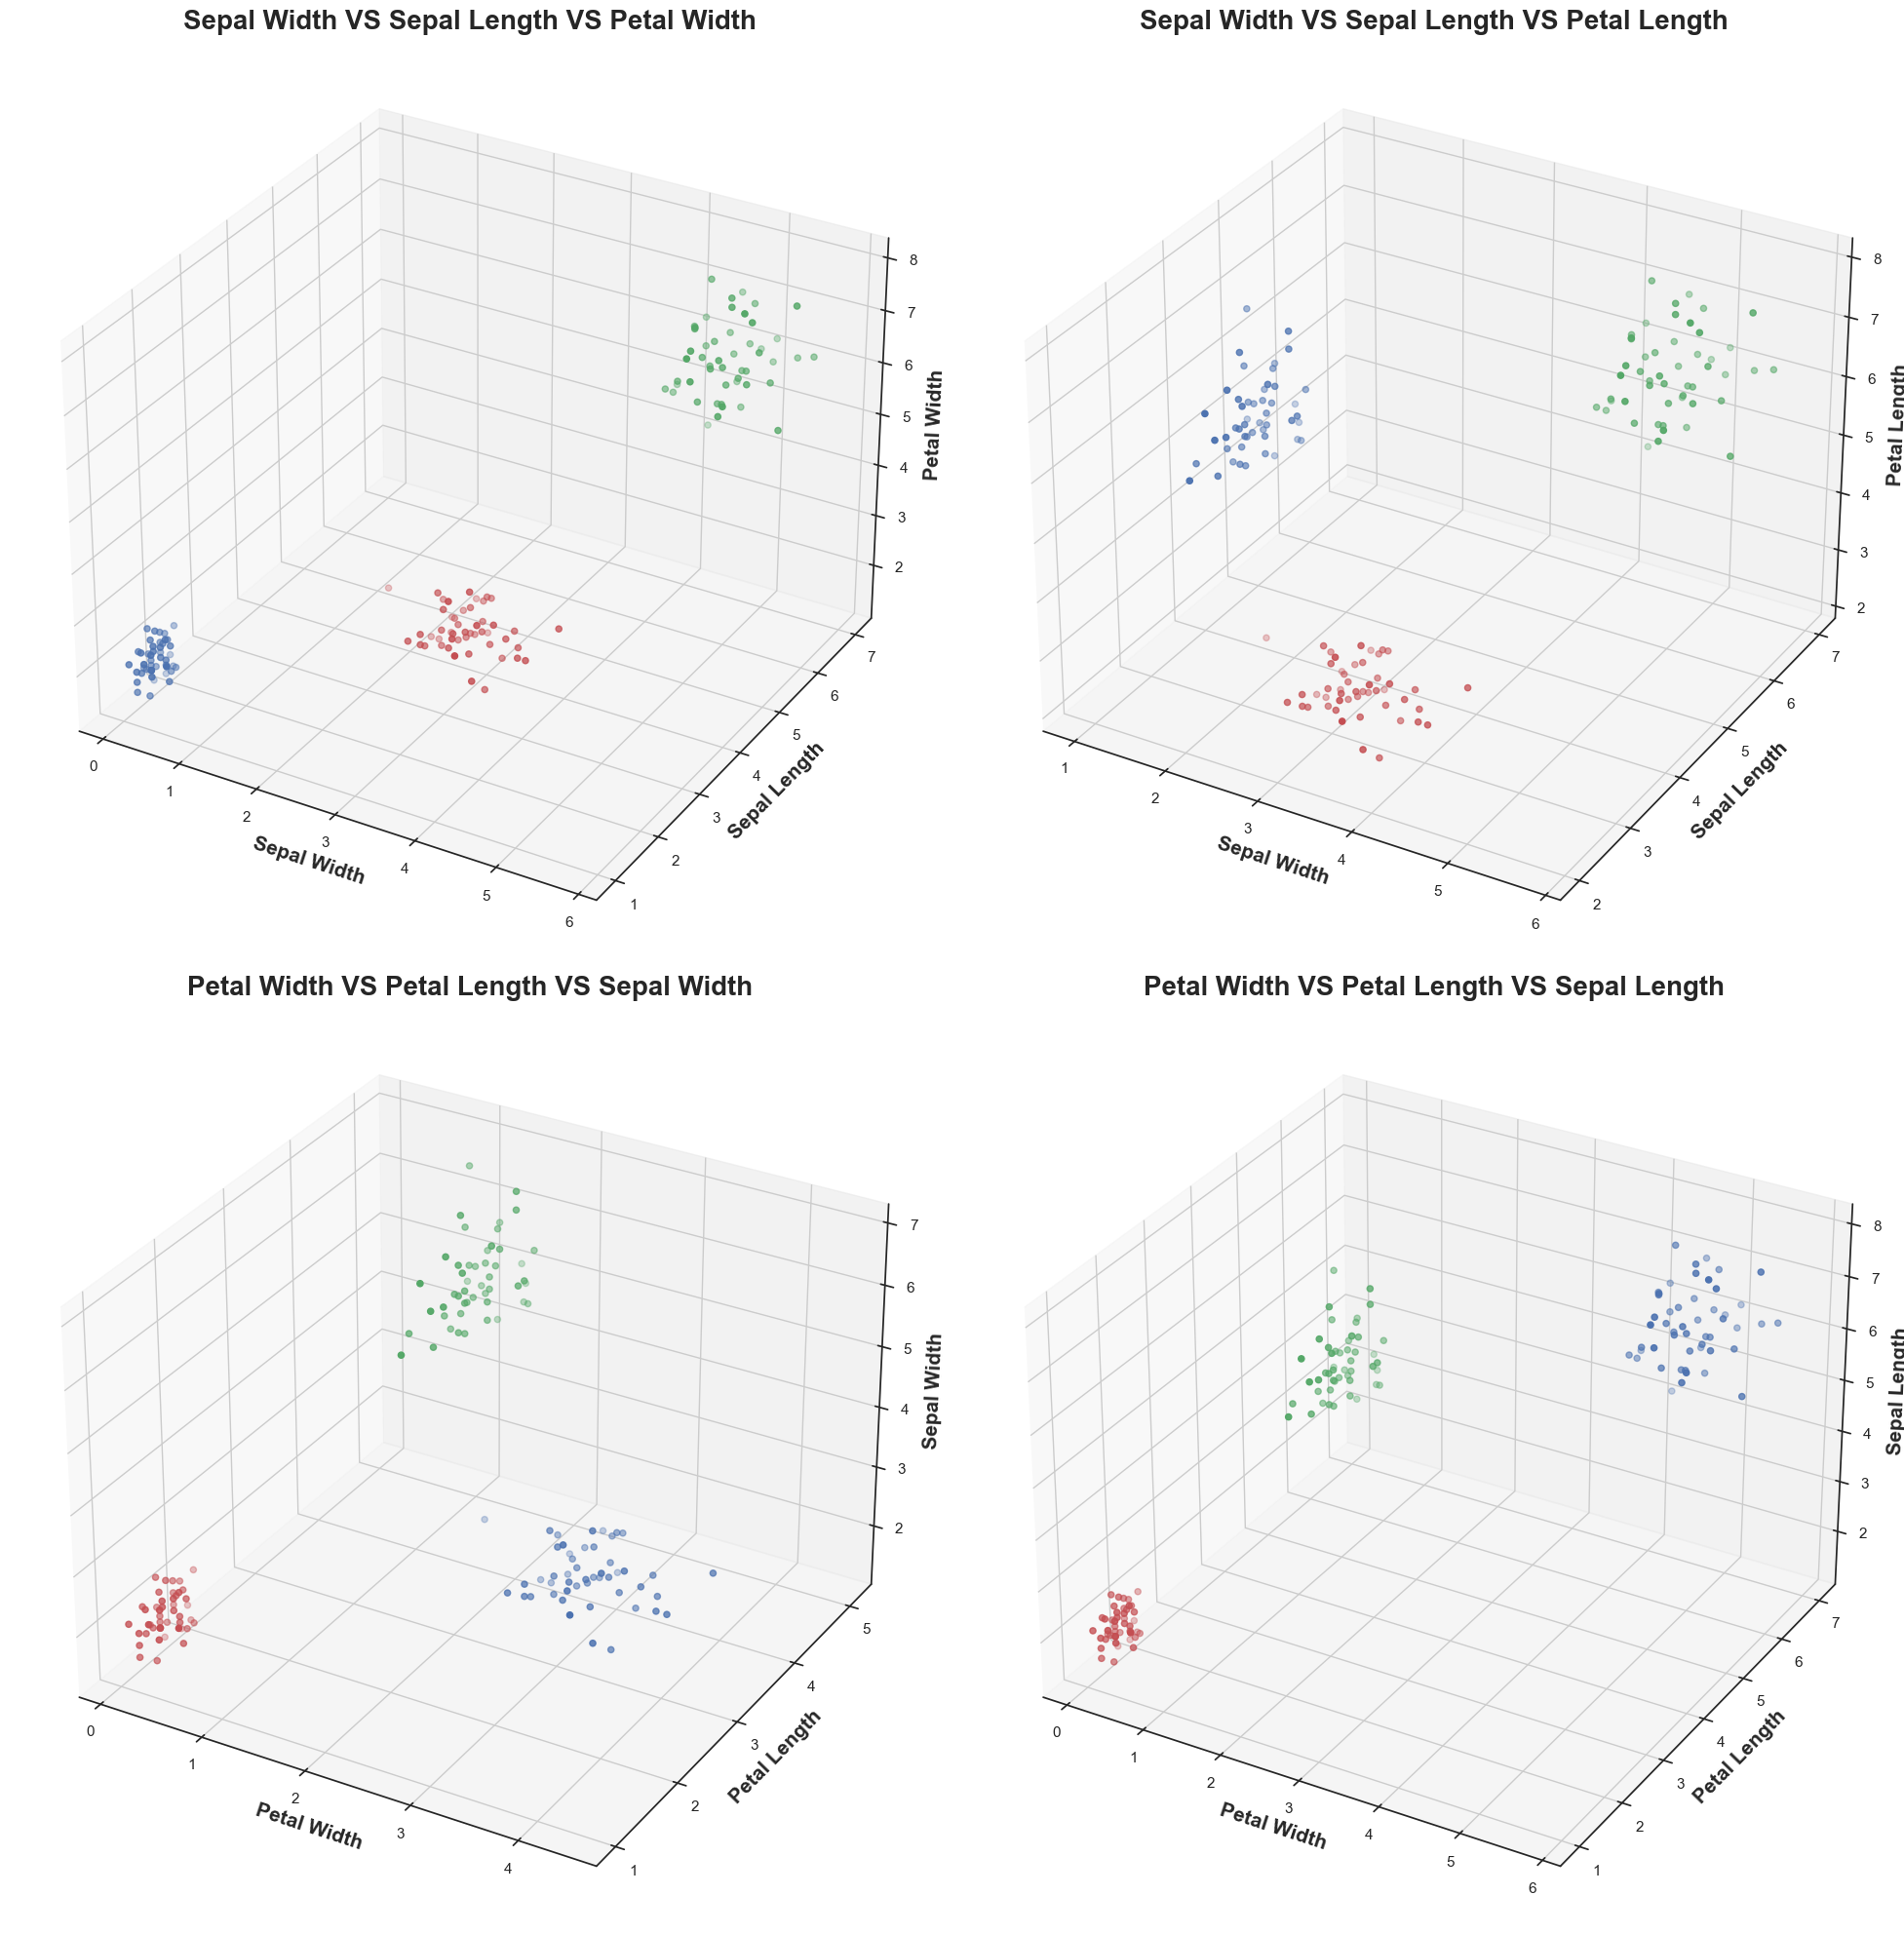

In [100]:
fig = plt.figure(figsize=(20, 20))

def create_3d(feature1, feature2, feature3):
    
    ax.scatter3D((df[df['Species'] == 'Iris-setosa'])[feature1], 
                 (df[df['Species'] == 'Iris-versicolor'])[feature1], 
                 (df[df['Species'] == 'Iris-virginica'])[feature1], 
                 color = 'r')
    
    ax.scatter3D((df[df['Species'] == 'Iris-setosa'])[feature2], 
                 (df[df['Species'] == 'Iris-versicolor'])[feature2], 
                 (df[df['Species'] == 'Iris-virginica'])[feature2], 
                 color = 'g')
    
    ax.scatter3D((df[df['Species'] == 'Iris-setosa'])[feature3], 
                 (df[df['Species'] == 'Iris-versicolor'])[feature3], 
                 (df[df['Species'] == 'Iris-virginica'])[feature3],
                 color = 'b')
    
    if(feature1 == 'SepalLengthCm'):
        feature1 = 'Sepal Length'
    if(feature1 == 'SepalWidthCm'):
        feature1 = 'Sepal Width'
    if(feature1 == 'PetalLengthCm'):
        feature1 = 'Petal Length'
    if(feature1 == 'PetalWidthCm'):
        feature1 = 'Petal Width'
    if(feature2 == 'SepalLengthCm'):
        feature2 = 'Sepal Length'
    if(feature2 == 'SepalWidthCm'):
        feature2 = 'Sepal Width'
    if(feature2 == 'PetalLengthCm'):
        feature2 = 'Petal Length'
    if(feature2 == 'PetalWidthCm'):
        feature2 = 'Petal Width'
    if(feature3 == 'SepalLengthCm'):
        feature3 = 'Sepal Length'
    if(feature3 == 'SepalWidthCm'):
        feature3 = 'Sepal Width'
    if(feature3 == 'PetalLengthCm'):
        feature3 = 'Petal Length'
    if(feature3 == 'PetalWidthCm'):
        feature3 = 'Petal Width'
        
    plt.title(feature1 + ' VS ' + feature2 + ' VS ' + feature3, fontweight = 'bold', size = 20)
    ax.set_xlabel(feature1, fontweight = 'bold', size = 15)
    ax.set_ylabel(feature2, fontweight = 'bold', size = 15)
    ax.set_zlabel(feature3, fontweight = 'bold', size = 15)
    
ax = fig.add_subplot(2, 2, 1, projection='3d')
create_3d('SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm')

ax = fig.add_subplot(2, 2, 2, projection='3d')
create_3d('SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm')

ax = fig.add_subplot(2, 2, 3, projection='3d')
create_3d('PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm')

ax = fig.add_subplot(2, 2, 4, projection='3d')
create_3d('PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm')

fig.tight_layout()
plt.show()

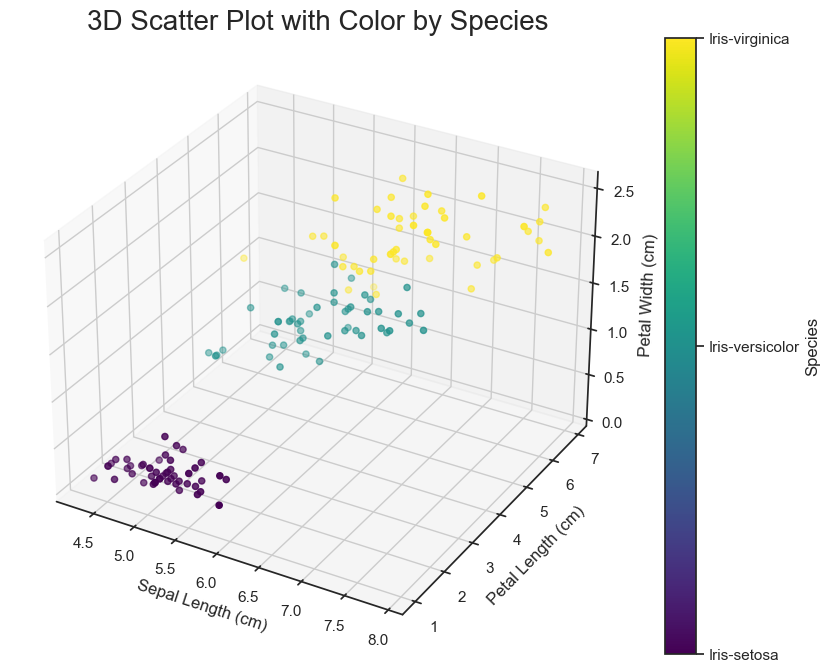

In [101]:
# Map species to numeric values
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['SpeciesNumeric'] = df['Species'].map(species_mapping)

# Increase the size of the plot
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['SepalLengthCm'], df['PetalLengthCm'], df['PetalWidthCm'], c=df['SpeciesNumeric'], cmap='viridis')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot with Color by Species', fontsize=20)
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(species_mapping.keys())
cbar.set_label('Species')
plt.show()

**Observations:**
- The `Iris-setosa` species (purple points) is clearly separated from the other two species. This suggests that setosa has distinct feature measurements compared to versicolor and virginica, which aligns with our previous observations from the univariate, bivariate, and multivariate analyses.
- The `Iris-versicolor` and `Iris-virginica` species (yellow and green points, respectively) show some overlap but also some degree of separation. This suggests that while these two species have similar feature measurements, there are still differences that can be used to distinguish between them.

## 2.5. Correlations Analysis

- `Correlation Analysis`: Correlation analysis is typically performed on numerical variables to understand the strength and direction of linear relationships between pairs of variables.
- Including categorical variables in correlation analysis isn't meaningful because correlation measures linear relationships between continuous variables, and categorical variables do not have a continuous scale.
- Therefore, it's essential to preprocess the data by converting categorical variables into a numerical format (dummy variables) and standardizing numerical variables to ensure that the correlation analysis accurately reflects the relationships between features.

First, One-Hot Encoding for Categorical Variables. The categorical column `Species` is transformed into dummy variables using one-hot encoding (`pd.get_dummies()`)

In [102]:
categorical_columns = ['Species']
numerical_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

Next, Standardization of Numerical Variables. The numerical columns (`SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`) are standardized using `StandardScaler()`.

In [103]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

After scaling the numerical columns and obtaining dummy variables for the categorical column, the processed numerical and categorical data are concatenated back together using `pd.concat()`.

In [104]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

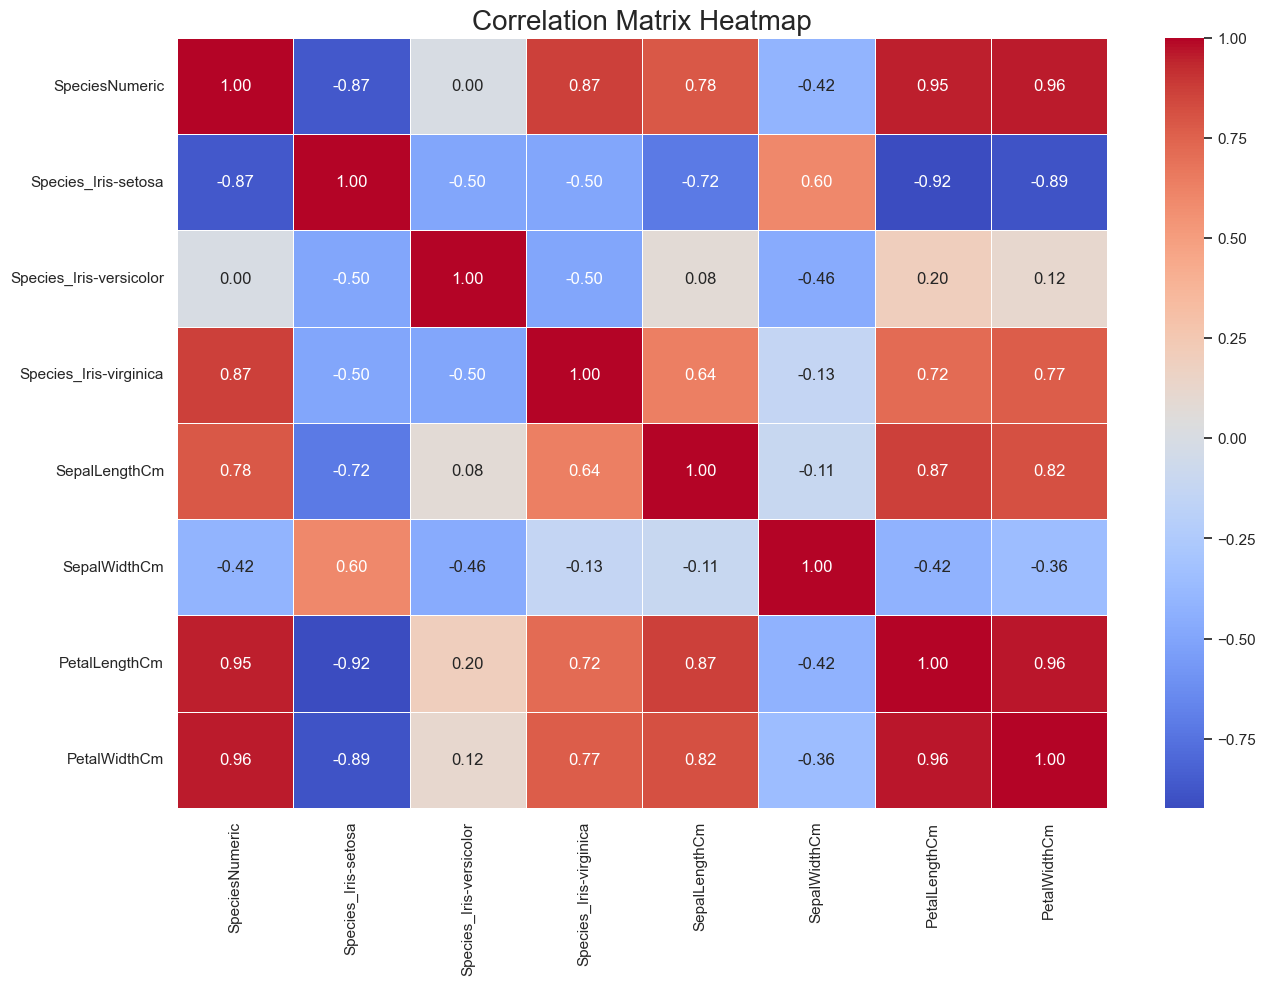

In [105]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap", fontsize=20)
plt.show()

**Observations:**

- `Species_Iris-setosa` is strongly negatively correlated with `PetalLengthCm` and `PetalWidthCm` (`-0.92` and `-0.88` respectively). This means that as the petal length and width increase, it's less likely to be a setosa. 

- `Species_Iris-versicolor` has weak positive correlations with `PetalLengthCm` and `PetalWidthCm` (`0.20` and `0.12` respectively), meaning these dimensions do not contribute significantly to being a versicolor. 

- `Species_Iris-virginica` has fairly strong positive correlations with `PetalLengthCm` and `PetalWidthCm` (`0.72` and `0.77` respectively). This suggests that as petal length and width increase, it's more likely to be a virginica. 

- `SepalLengthCm` has strong positive correlations with `PetalLengthCm` and `PetalWidthCm` (`0.87` and `0.81` respectively). This implies that as sepal length increases, petal length and width also tend to increase. 

- `SepalWidthCm` is negatively correlated with `PetalLengthCm` and `PetalWidthCm` (`-0.42` and `-0.35` respectively), suggesting that as the sepal width increases, the petal length and width tend to decrease, but this correlation is not very strong. 

- `PetalLengthCm` and `PetalWidthCm` are very strongly correlated (`0.96`), implying that petal length and width tend to increase together.

# 3. Insights

# 4. References